In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Importing the dataset
fev = pd.read_excel("FEV-data-Excel.xlsx")

In [4]:
print(fev.head())

                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0  disc (front + rear)        

In [29]:
# Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)
# b) Group them by the manufacturer (Make).(6 marks)
# c) Calculate the average battery capacity for each manufacturer. (8 Marks)

filtered_ev = fev[(fev["Minimal price (gross) [PLN]"] <= 350000) & (fev["Range (WLTP) [km]"] >= 400)]
grouped_ev = filtered_ev.groupby("Make")
avg_battery_capacity = grouped_ev["Battery capacity [kWh]"].mean()
avg_battery_capacity = avg_battery_capacity.reset_index()
print(avg_battery_capacity)

# Results below show that Audi, BMW, and Hyundai have the highest average battery capacities, given the 
# budget and range constraint, while Tesla and Volkswagen have relatively lower capacities.
# The customer should therefore buy either Audi, BMW, or Hyundai.


            Make  Battery capacity [kWh]
0           Audi               95.000000
1            BMW               80.000000
2        Hyundai               64.000000
3            Kia               64.000000
4  Mercedes-Benz               80.000000
5          Tesla               68.000000
6     Volkswagen               70.666667


In [5]:
fev.rename(columns={"mean - Energy consumption [kWh/100 km]": "EnergyConsumption"}, inplace=True)


In [6]:
# Task 2: You suspect some EVs have unusually high or low energy consumption. 
#     Find the outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

# To detect outliers, we can use IQR (or Interquartile Range) method. To do so, we must calculate
# Q1 & Q3. 50% of the observations will lie between Q1 and Q3. Anthing outside this range can be
# considered an outlier

fev["EnergyConsumption"].fillna(0, inplace=True)
fev_cleaned = fev["EnergyConsumption"]
fev_cleaned = fev_cleaned[fev_cleaned > 0]


if len(fev_cleaned) > 0:
    q1 = np.percentile(fev_cleaned, 25)
    q3 = np.percentile(fev_cleaned, 75)
else:
    q1, q3 = 0, 0 

iqr = q3 - q1
print("IQR:", iqr)


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


outliers = fev[(fev["EnergyConsumption"] < lower_bound) | (fev["EnergyConsumption"] > upper_bound)]
print("The outliers are :", outliers[["Car full name", "Make", "Model", "EnergyConsumption"]])

#There are 9 outliers in the given dataframe

IQR: 7.9
Lower Bound: 3.7499999999999982
Upper Bound: 35.35
The outliers are :                         Car full name     Make                        Model  \
9                        Citroën ë-C4  Citroën                         ë-C4   
29                     Peugeot e-2008  Peugeot                       e-2008   
39  Tesla Model 3 Standard Range Plus    Tesla  Model 3 Standard Range Plus   
40           Tesla Model 3 Long Range    Tesla           Model 3 Long Range   
41          Tesla Model 3 Performance    Tesla          Model 3 Performance   
42      Tesla Model S Long Range Plus    Tesla      Model S Long Range Plus   
43          Tesla Model S Performance    Tesla          Model S Performance   
44      Tesla Model X Long Range Plus    Tesla      Model X Long Range Plus   
45          Tesla Model X Performance    Tesla          Model X Performance   

    EnergyConsumption  
9                 0.0  
29                0.0  
39                0.0  
40                0.0  
41        

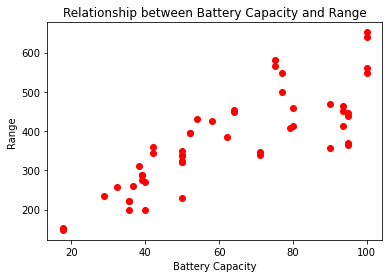

In [7]:
# Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
# a) Create a suitable plot to visualize.(8 Marks)
# b) Highlight any insights.(8 Marks)

x = fev["Battery capacity [kWh]"]
y = fev["Range (WLTP) [km]"]
plt.scatter(x,y,color="red")
plt.title("Relationship between Battery Capacity and Range")
plt.xlabel("Battery Capacity")
plt.ylabel("Range")
plt.show()

# The scatter plot shows that there's a positive correlation between the battery Capacity and range
# As battery capacity increases, the range also tends to increase, 
# showing that EVs with larger batteries generally travel farther.

In [10]:
# Task 4: Build an EV recommendation class. The class should allow users to input their 
# budget, desired range, and battery capacity. The class should then return the top three EVs 
# matching their criteria. (8+8 Marks)

class EVRecommendation:
    def __init__(self, dataframe):
        self.fev = dataframe 

    def get_input(self):
        print("EV Recommendation Class")
        self.budget = int(input("Enter your budget: "))
        self.min_range = int(input("Enter the desired range: "))
        self.battery = int(input("Enter the battery capacity: "))

    def recommend_evs(self):
        filtered_evs = self.fev[
            (self.fev["Minimal price (gross) [PLN]"] <= self.budget) &
            (self.fev["Range (WLTP) [km]"] >= self.min_range) &
            (self.fev["Battery capacity [kWh]"] >= self.battery)
        ]

        recommended_evs = filtered_evs.sort_values(by="Range (WLTP) [km]", ascending=False).head(3)

        if not recommended_evs.empty:
            print("Top 3 Recommended EVs:")
            print(recommended_evs[["Car full name", "Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]])
        else:
            print("No EVs match your criteria. Try with different inputs")

ev_system = EVRecommendation(fev)
ev_system.get_input()
ev_system.recommend_evs() 

#This class function returns the top 3 recommended EVs to the user as per the entered input by the user

EV Recommendation Class
Enter your budget: 350000
Enter the desired range: 350
Enter the battery capacity: 10
Top 3 Recommended EVs:
                Car full name        Make                Model  \
40   Tesla Model 3 Long Range       Tesla   Model 3 Long Range   
41  Tesla Model 3 Performance       Tesla  Model 3 Performance   
48      Volkswagen ID.3 Pro S  Volkswagen           ID.3 Pro S   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  Battery capacity [kWh]  
40                       235490                580                    75.0  
41                       260490                567                    75.0  
48                       179990                549                    77.0  


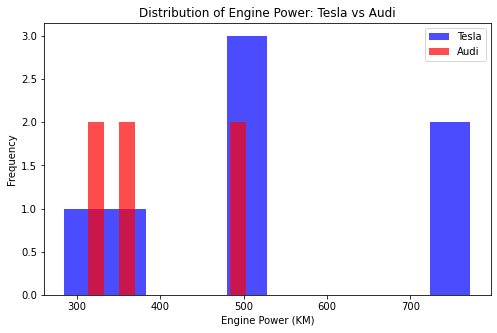

T-Statistic: 1.7939951827297183
P-Value: 0.10684105068839563


In [9]:

# Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in 
#         the average Engine power [KM] of vehicles manufactured by two leading manufacturers 
#         i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations 
#         and Conclusion: Provide actionable insights based on your analysis. 
#         (Conduct a two sample t-test using ttest_ind from scipy.stats module) (16 Marks)


from scipy.stats import ttest_ind
tesla_power = fev[fev["Make"] == "Tesla"]["Engine power [KM]"].dropna()
audi_power = fev[fev["Make"] == "Audi"]["Engine power [KM]"].dropna()

plt.figure(figsize=(8,5))
plt.hist(tesla_power, bins=10, alpha=0.7, label="Tesla", color="blue")
plt.hist(audi_power, bins=10, alpha=0.7, label="Audi", color="red")
plt.xlabel("Engine Power (KM)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Engine Power: Tesla vs Audi")
plt.show()

t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)



In [ ]:
# After conducting the two-sample t-test to compare the average engine power of Tesla and Audi vehicles, 
# we can see that the t-statistic is 1.79 and the p-value is 0.1068. Given that the p-value is greater than 0.05, 
# we can fail to reject the null hypothesis. It means that there is no statistically significant difference in the 
# avg engine power between Tesla and Audi. Even though Tesla seems to have a higher engine power on avg, 
# the difference is not strong enough to be considered statistically significant. 